<a href="https://colab.research.google.com/github/moizmaj1k/MachineLearning/blob/main/ML_06_DummyVariables%26OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('homeprices.csv')
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [3]:
# Pandas built-in function to get dummy variables for or Categorical variable
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:
# Merge Dummies with the actual Dataframe

merged = pd.concat([df, dummies], axis=1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
df = merged.drop('town', axis=1)
df

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [6]:
'''

  - We always have to drop one column from our dummy variable columns
  - We do this to avoid dummy variable trap
  - The Dummy Variable Trap occurs when two or more dummy variables
    created by one-hot encoding are highly correlated (multi-collinear).
    This means that one variable can be predicted from the others, making
    it difficult to interpret predicted coefficient variables in regression
    models.

  NOTE: sklearn.LinearRegression() will automatically drop one of the dummy
        variable columns because it is aware of the dummy variable trap.
        Generally, it's good practice to drop one yourself.

'''

df = df.drop('west windsor', axis=1)
df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
from sklearn.linear_model import LinearRegression

X = df.drop('price', axis=1)
y = df.price

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [8]:
# Making predicition for 2800 area hourse in robinsville
# First value is area(2800), Second value is for monroe township,
# Third value is for robinsville

lr.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [9]:
# What if we want to predict a 3400 sq-ft area house in
# west windsor(dummy variable that we dropped)
# We simply set 2nd and 3rd values to 0

lr.predict([[3400,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [10]:
lr.score(X, y)

0.9573929037221872

<h3>sklearn One Hot Encoding</h3>

In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2 = pd.read_csv('homeprices.csv')

In [16]:
dfle = df2
dfle.town = le.fit_transform(dfle.town)

In [17]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [18]:
# We use .values because we want X to be a 2-dimensional array
# and not a Dataframe
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [19]:
y = dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
# One Hot Endcoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories=[0])

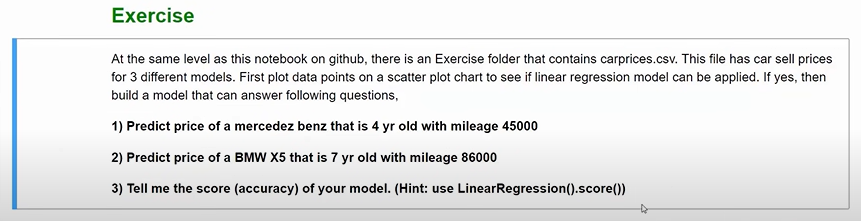

In [25]:
import numpy as np
import pandas as pd

df = pd.read_csv('ML_06_carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


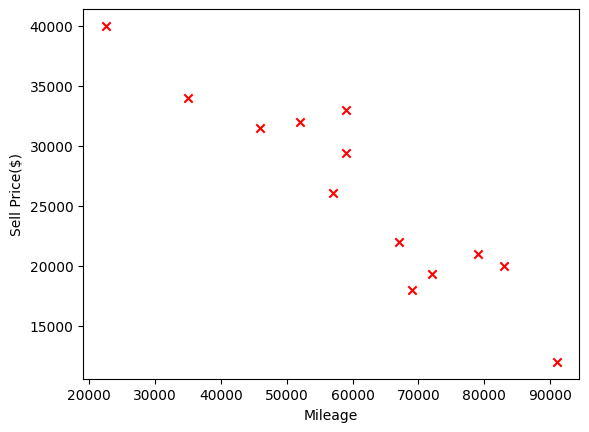

In [26]:
# First lets plot a scatter plot on a graph to see if we can apply Linear Regression
import matplotlib.pyplot as plt

# Scatter plot for Mileage vs Price
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df[['Mileage']], df[['Sell Price($)']], color='red', marker='x')

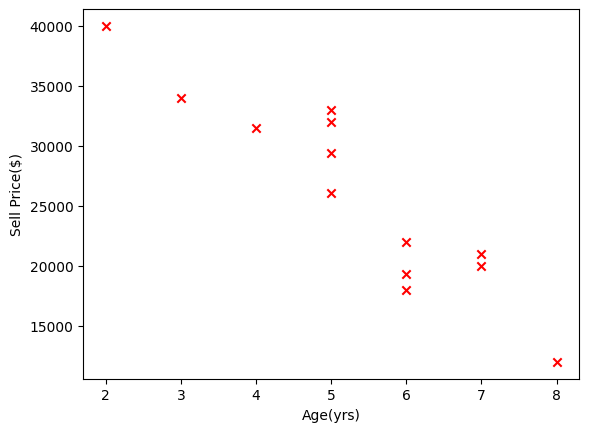

In [27]:
# Scatter plot for Age vs Price
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df[['Age(yrs)']], df[['Sell Price($)']], color='red', marker='x')

In [29]:
# Now we will One Hot Encode the 'Car Model' column usinf pd.get_dummies()

dummies = pd.get_dummies(df[['Car Model']])
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [30]:
df = pd.concat([df, dummies], axis=1)
df

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [31]:
# Finally we will drop 'Car Model' columns because we dont need it
# Alse, we will drop Mercedez dummy column so that we dont fall into dummy variable trap

df = df.drop('Car Model', axis=1)
df = df.drop('Car Model_Mercedez Benz C class', axis=1)
df

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [32]:
from sklearn.linear_model import LinearRegression

X = df.drop('Sell Price($)', axis=1)
y = df[['Sell Price($)']]

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [33]:
# Making the predictions required in Exercise

# Predict price of a mercedez benz that is 4 yr old with mileage 45000
print(f'mercedez benz that is 4 yr old with mileage 45000: {lr.predict([[45000,4,0,0]])}')

# Predict price of a BMW X5 that is 7 yr old with mileage 86000
print(f'BMW X5 that is 7 yr old with mileage 86000: {lr.predict([[86000,7,0,1]])}')

mercedez benz that is 4 yr old with mileage 45000: [[36991.31721061]]
BMW X5 that is 7 yr old with mileage 86000: [[11080.74313219]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
# Score(Accuracy) of model
lr.score(X,y)

0.9417050937281082